# Predicting Student Placement Outcomes Using Logistic Regression

**🧾 Introduction**

**Importing Libraries**

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Data Collection**

In [20]:
df=pd.read_csv("modified_placement_data.csv")
df

,cgpa,iq,placement
0,"6,8",123.0,Yes
1,"5,9",106.0,No
2,"5,3",121.0,No
3,"7,4",132.0,Yes
4,"5,8",142.0,No
...,...,...,...
95,"4,3",200.0,No
96,"4,4",42.0,No
97,"6,7",182.0,Yes
98,"6,3",103.0,Yes


In [21]:
df.head()

,cgpa,iq,placement
0,"6,8",123.0,Yes
1,"5,9",106.0,No
2,"5,3",121.0,No
3,"7,4",132.0,Yes
4,"5,8",142.0,No


In [22]:
df.describe()

,iq
count,100.000000
mean,123.580000
std,39.944198
min,37.000000
25%,101.500000
50%,127.500000
75%,149.000000
max,233.000000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       95 non-null     object 
 1   iq         100 non-null    float64
 2   placement  100 non-null    object 
dtypes: float64(1), object(2)
memory usage: 2.5+ KB


In [24]:
df.shape

(100, 3)

**Data Preprocessing**

df.isnull().sum()

In [26]:
df['cgpa'] = pd.to_numeric(df['cgpa'].astype(str).str.replace(',', '.', regex=False).str.strip(), errors='coerce')
df['cgpa'] = df['cgpa'].fillna(df['cgpa'].median())
print(df.isnull().sum())

cgpa         0
iq           0
placement    0
dtype: int64


In [27]:
# Steps
# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

**Exploratory Data Analysis (EDA)**

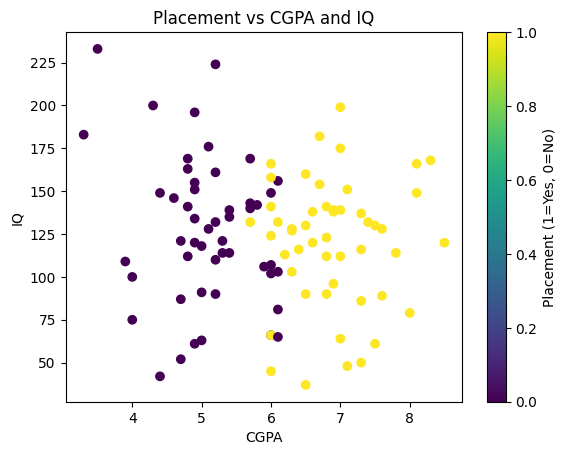

In [61]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'], cmap='viridis')
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.title('Placement vs CGPA and IQ')
plt.colorbar(label='Placement (1=Yes, 0=No)')
plt.show()

**Model Building**

In [32]:
X=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [33]:
X.head()

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0


In [34]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [35]:
y.shape

(100,)

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [37]:
X_train

,cgpa,iq
38,6.5,160.0
80,4.9,196.0
30,7.6,128.0
53,8.3,168.0
78,6.1,81.0
...,...,...
37,8.1,149.0
51,4.8,141.0
2,5.3,121.0
45,6.0,66.0


In [38]:
y_train

38    1
80    0
30    1
53    1
78    0
     ..
37    1
51    0
2     0
45    1
39    0
Name: placement, Length: 90, dtype: int64

In [39]:
X_test

,cgpa,iq
3,7.4,132.0
32,7.0,139.0
33,6.0,149.0
17,3.3,183.0
24,4.7,121.0
98,6.3,103.0
77,7.3,50.0
97,6.7,182.0
22,4.9,120.0
19,5.2,132.0


In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler=StandardScaler()

In [42]:
X_train=scaler.fit_transform(X_train)

In [43]:
X_train

array([[ 4.51652439e-01,  9.31165429e-01],
       [-9.96854270e-01,  1.83094950e+00],
       [ 1.44750080e+00,  1.31357366e-01],
       [ 2.08122249e+00,  1.13111744e+00],
       [ 8.95257619e-02, -1.04336073e+00],
       [-2.72600916e-01,  1.15611145e+00],
       [ 2.70589101e-01,  1.31357366e-01],
       [ 7.23247448e-01,  6.38735606e-03],
       [-2.26429764e+00,  2.75572757e+00],
       [ 5.42184109e-01,  3.81297386e-01],
       [ 7.23247448e-01,  4.56279391e-01],
       [-2.72600916e-01,  5.06267395e-01],
       [ 1.80962748e+00, -1.09334873e+00],
       [-1.00590744e-03,  3.13813580e-02],
       [-9.96854270e-01,  7.06219411e-01],
       [-1.08738594e+00,  1.15611145e+00],
       [ 9.94842456e-01, -1.86816279e+00],
       [-1.08738594e+00, -2.68546666e-01],
       [ 1.44750080e+00, -8.43408711e-01],
       [ 4.51652439e-01,  1.81345370e-01],
       [-8.15790932e-01,  1.33106946e+00],
       [-1.17791761e+00, -1.76818678e+00],
       [-1.00590744e-03,  4.56279391e-01],
       [-1.

In [44]:
X_test=scaler.transform(X_test)

In [45]:
X_test

array([[ 1.26643746e+00,  2.31333374e-01],
       [ 9.04310786e-01,  4.06291388e-01],
       [-1.00590744e-03,  6.56231407e-01],
       [-2.44536098e+00,  1.50602747e+00],
       [-1.17791761e+00, -4.36006479e-02],
       [ 2.70589101e-01, -4.93492683e-01],
       [ 1.17590579e+00, -1.81817479e+00],
       [ 6.32715778e-01,  1.48103347e+00],
       [-9.96854270e-01, -6.85946498e-02],
       [-7.25259262e-01,  2.31333374e-01]])

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
clf=LogisticRegression()

In [49]:
#model training 
clf.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [50]:
y_pred=clf.predict(X_test)

In [51]:
y_test

3     1
32    1
33    0
17    0
24    0
98    1
77    1
97    1
22    0
19    0
Name: placement, dtype: int64

In [52]:
from sklearn.metrics import accuracy_score

In [53]:
accuracy_score(y_test,y_pred)

0.9

In [55]:
pip install mlxtend

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 325.7 kB/s  0:00:05 eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [56]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

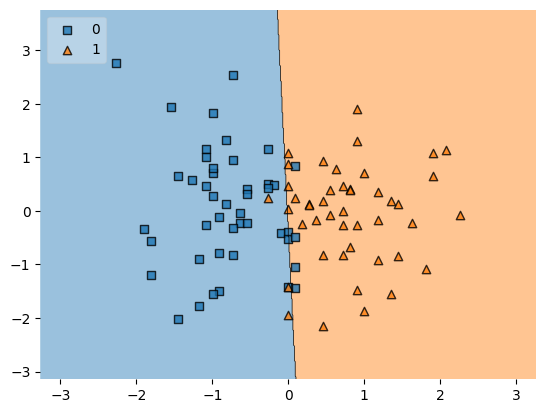

In [57]:
plot_decision_regions(X_train,y_train.values,clf=clf,legend=2)

In [58]:
import pickle

In [59]:
pickle.dump(clf,open('model.pkl','wb'))

**Conclusion**